# User Engagement Analysis

In [1]:
import os
notebook_dir = os.getcwd()
parent_path=os.path.dirname(notebook_dir)

os.chdir(parent_path)

In [2]:
from script.connection import Connector

In [3]:
# instance of the class
connector=Connector()

In [4]:
xdr_data=connector.load_table_to_dataframe('xdr_data_cleaned')
aggregated_xdr_data=connector.load_table_to_dataframe('aggregated_xdr_data')

g:\Programming\10_Academy\Week_02\Telecom_Company_Users_Data_Analytics\script\connection.py:31: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  df = pd.read_sql_query(query, connection)


PostgreSQL connection is closed
PostgreSQL connection is closed


In [5]:
from script.user_engagement_analyzer import EngagementAnalyzer

In [6]:
analyzer=EngagementAnalyzer()

### Top 10 customers per engagement metric 


In [7]:
customer_aggregation,top_10_freq, top_10_duration, top_10_traffic = analyzer.aggregate_engagement_metrics(xdr_data)

In [8]:
top_10_freq

,MSISDN/Number,session_frequency
13467,3.362632e+10,18
6404,3.361489e+10,17
13123,3.362578e+10,17
36909,3.365973e+10,16
76077,3.367588e+10,15
92584,3.376054e+10,15
64883,3.366716e+10,13
658,3.360313e+10,12
1270,3.360452e+10,12
13934,3.362708e+10,12


In [9]:
top_10_traffic

,MSISDN/Number,total_traffic
6404,3.361489e+10,8.846226e+09
92584,3.376054e+10,8.514774e+09
13123,3.362578e+10,8.499621e+09
13467,3.362632e+10,7.971167e+09
76077,3.367588e+10,7.891111e+09
36909,3.365973e+10,7.705863e+09
62804,3.366646e+10,7.308501e+09
92239,3.376041e+10,7.132371e+09
57032,3.366471e+10,6.872018e+09
86138,3.369879e+10,6.540899e+09


In [10]:
top_10_duration

,MSISDN/Number,total_duration
36909,3.365973e+10,3.637874e+06
76077,3.367588e+10,3.010553e+06
57032,3.366471e+10,2.927785e+06
60123,3.366553e+10,2.696785e+06
13467,3.362632e+10,2.514078e+06
35296,3.365936e+10,2.389230e+06
75921,3.367557e+10,2.307816e+06
6404,3.361489e+10,2.185244e+06
92584,3.376054e+10,2.174786e+06
39181,3.366027e+10,2.140473e+06


### Normalize each engagement metric and run a k-means (k=3) to classify customers in three groups of engagement. 


In [11]:
classified_customers = analyzer.classify_customers_kmeans(xdr_data)

g:\Programming\10_Academy\Week_02\Telecom_Company_Users_Data_Analytics\.venv\Lib\site-packages\joblib\externals\loky\backend\context.py:136: UserWarning: Could not find the number of physical cores for the following reason:
[WinError 2] The system cannot find the file specified
Returning the number of logical cores instead. You can silence this warning by setting LOKY_MAX_CPU_COUNT to the number of cores you want to use.
  warnings.warn(
  File "g:\Programming\10_Academy\Week_02\Telecom_Company_Users_Data_Analytics\.venv\Lib\site-packages\joblib\externals\loky\backend\context.py", line 257, in _count_physical_cores
    cpu_info = subprocess.run(
               ^^^^^^^^^^^^^^^
  File "C:\Users\HP\AppData\Local\Programs\Python\Python312\Lib\subprocess.py", line 548, in run
    with Popen(*popenargs, **kwargs) as process:
         ^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\HP\AppData\Local\Programs\Python\Python312\Lib\subprocess.py", line 1026, in __init__
    self._execute_child(args,

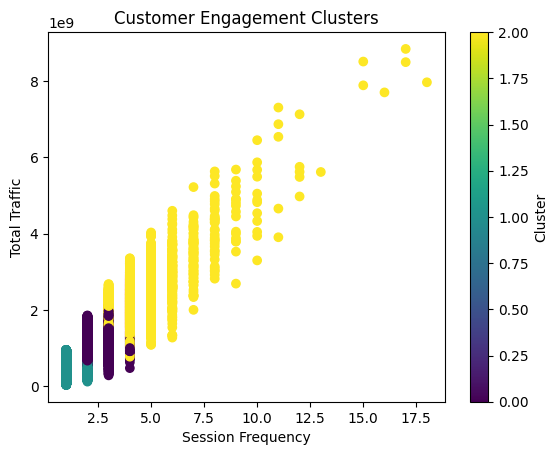

In [12]:
analyzer.plot_clusters(classified_customers)

### Compute the minimum, maximum, average & total non-normalized metrics for each cluster.

In [13]:
cluster_stats = analyzer.cluster_summary_stats(classified_customers)

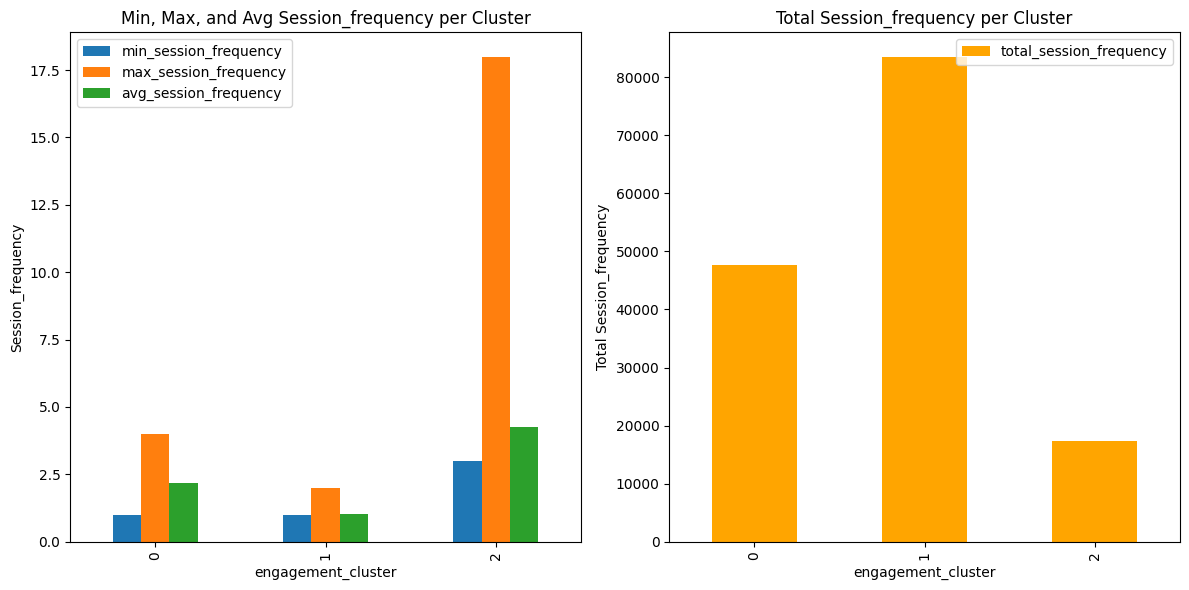

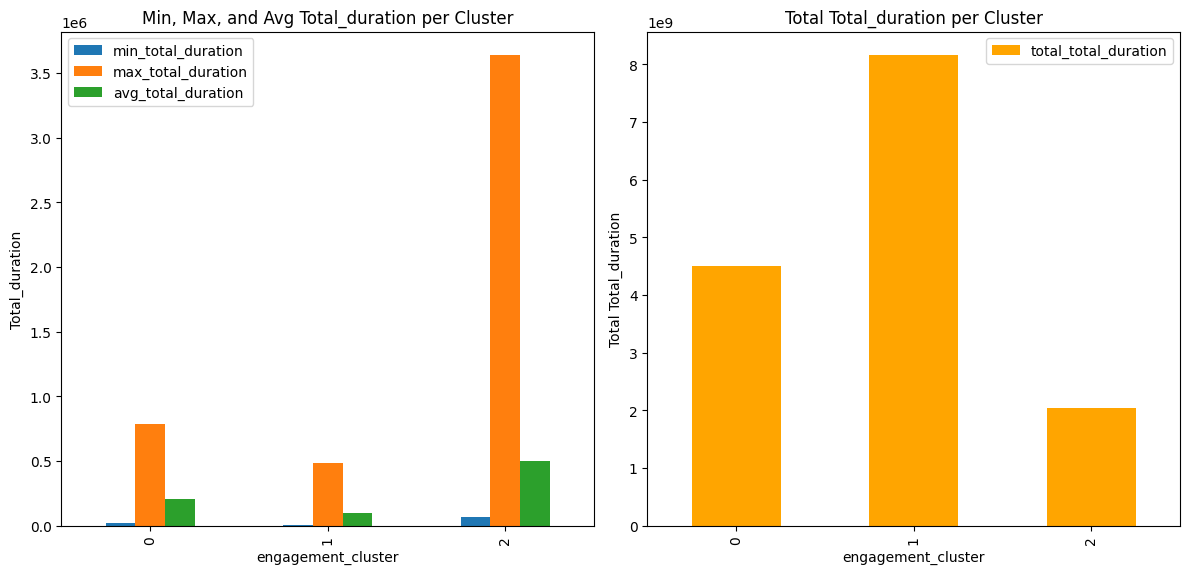

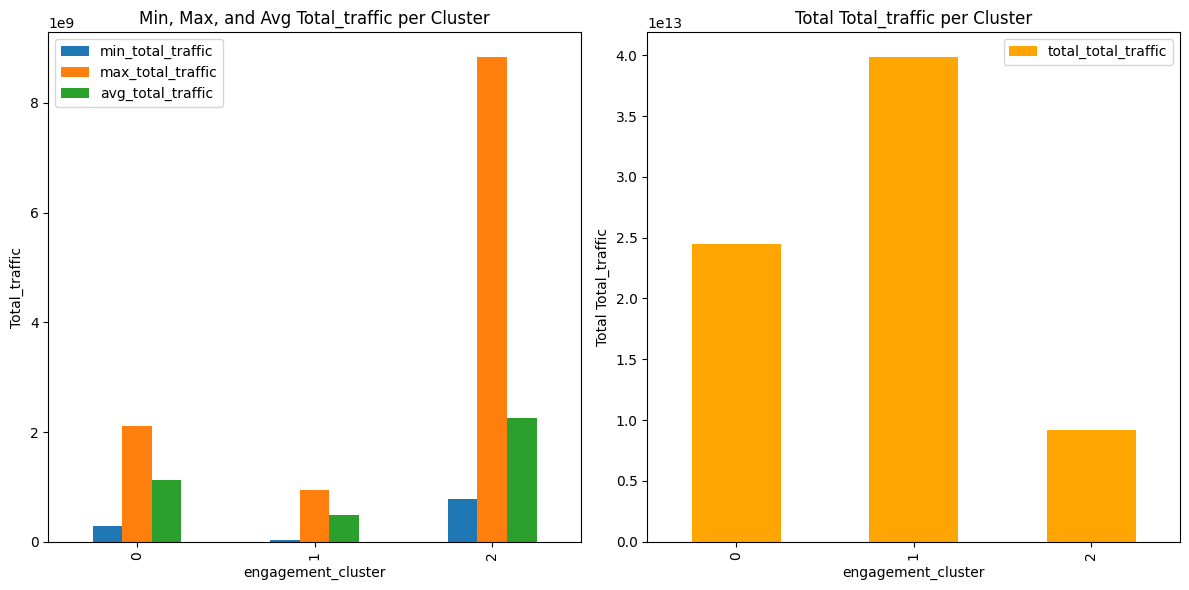

In [14]:
analyzer.plot_cluster_summary(cluster_stats)

### Aggregate user total traffic per application and derive the top 10 most engaged users per application

In [15]:
top_10_users = analyzer.top_10_users_per_application(xdr_data)
print(top_10_users['Social Media'])

        MSISDN/Number  total_social_media_traffic
13467    3.362632e+10                  43374779.0
92584    3.376054e+10                  39783189.0
36909    3.365973e+10                  35412358.0
6404     3.361489e+10                  28294544.0
13123    3.362578e+10                  27135500.0
64883    3.366716e+10                  24247850.0
105756   3.378632e+10                  23974919.0
70705    3.366907e+10                  23800834.0
658      3.360313e+10                  23077825.0
31201    3.365849e+10                  23000066.0


### Plot Top 3 Applications

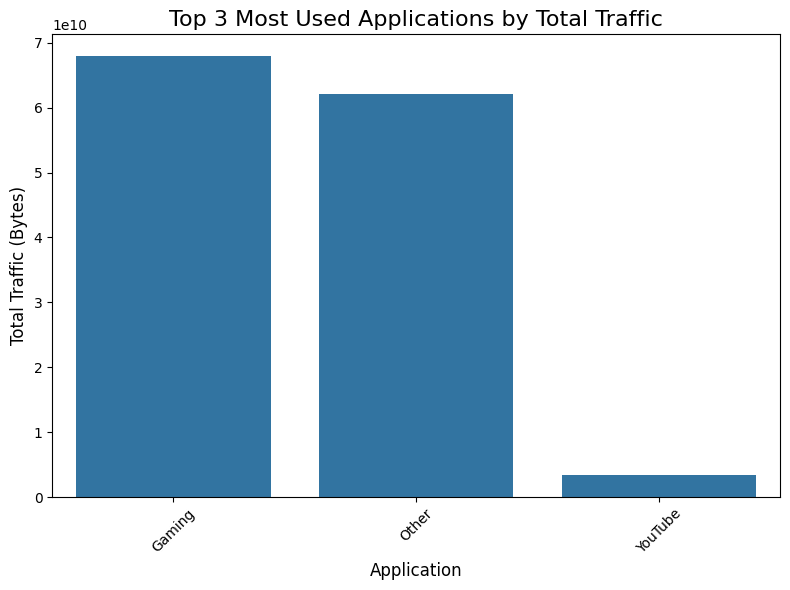

In [16]:
analyzer.plot_top_3_applications(top_10_users)

###  k-means clustering algorithm

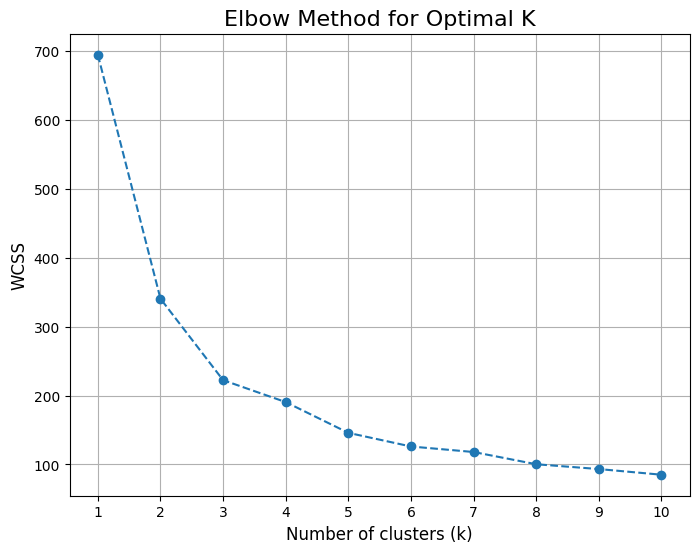

(range(1, 11),
 [694.7088348840833,
  340.59940089443694,
  222.37269501873664,
  190.53015497886105,
  145.90366467520062,
  126.08542843330565,
  118.07591045042417,
  100.32623886118151,
  93.32681465778799,
  85.11726365224656])

In [17]:
engagement_metrics=customer_aggregation
analyzer.find_optimal_k(xdr_data, engagement_metrics)

In [18]:
clustered_data = analyzer.kmeans_clustering(xdr_data, engagement_metrics, 3)

In [19]:
clustered_data

,MSISDN/Number,session_frequency,total_duration,total_dl,total_ul,total_traffic,Cluster
0,3.360100e+10,1,116720.000000,8.426375e+08,36053108.0,8.786906e+08,1
1,3.360100e+10,1,181230.000000,1.207552e+08,36104459.0,1.568596e+08,1
2,3.360100e+10,1,134969.000000,5.566597e+08,39306820.0,5.959665e+08,1
3,3.360101e+10,1,49878.000000,4.019932e+08,20327526.0,4.223207e+08,1
4,3.360101e+10,2,37104.000000,1.363130e+09,94280527.0,1.457411e+09,0
...,...,...,...,...,...,...,...
106466,3.379000e+10,1,8810.000000,6.879252e+08,26716429.0,7.146416e+08,1
106467,3.379000e+10,1,140988.000000,4.445751e+08,35732243.0,4.803073e+08,1
106468,3.197021e+12,1,98618.088994,1.948281e+08,37295915.0,2.321240e+08,1
106469,3.370000e+14,1,253030.000000,5.396350e+08,56652839.0,5.962878e+08,1
